In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Question 1

1a: Write a Python script that simulates the activity of a single Izhikevich neuron
receiving a constant input current I = 10. Use the parameters for an excitatory
(regular spiking) neuron from the lecture notes, a step size of 𝛿𝑡 = 0.1, and
initial conditions v = -65, u = -1.

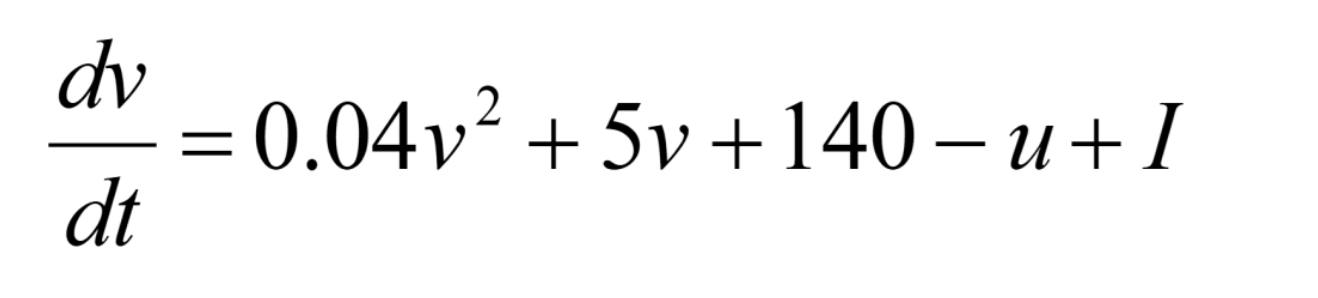
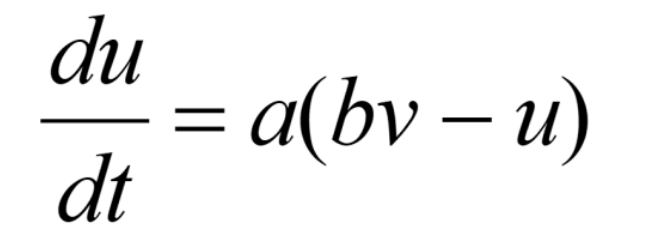
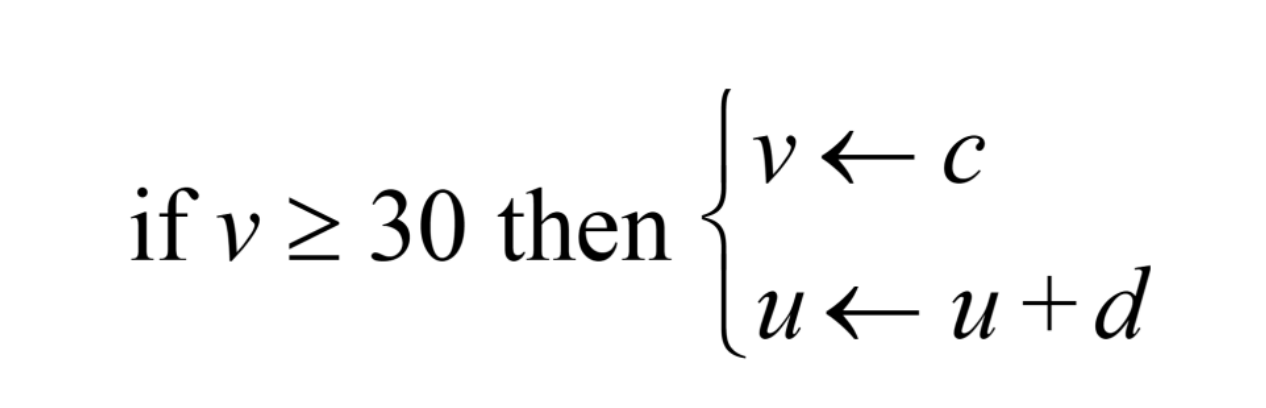

$u(t + 1) = u(t) + \delta t \frac{du}{dt}$<br>
$u(t + 1) = u(t) + \delta t (a(bv(t) - u(t)))$

$v(t + 1)= v(t) + \delta t \frac{dv}{dt}$<br>
$v(t + 1) = v(t) + \delta t (0.04 ^ 2 + 5v(t) + 140 - u(t) + I)$

In [183]:
delta_t = 0.1
end_time = 200
vs = [-65]
us = [-1]
ts = np.arange(0, end_time, delta_t)


I = 10
a = 0.02
b = 0.2
c = -65
d = 8


for i in range(1, len(ts)):
    t = ts[i-1]
    v = vs[i-1]
    u = us[i-1]

    u_new = u + (delta_t * (a * ((b * v) - (u))))

    delta_v = (0.04 * (v * v)) + (5 * v) + 140 - u + I

    v_new = v + (delta_t * delta_v)

    if v == 30:
        v_new = c
        u_new = u + d
    elif v_new >= 30:
        v_new = 30

    us.append(u_new)
    vs.append(v_new)
    

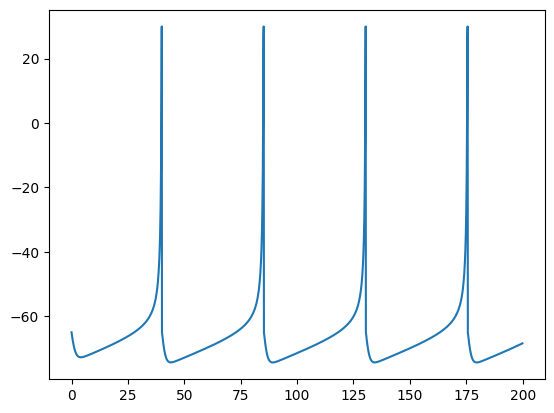

In [184]:
plt.plot(ts, vs)
plt.show()

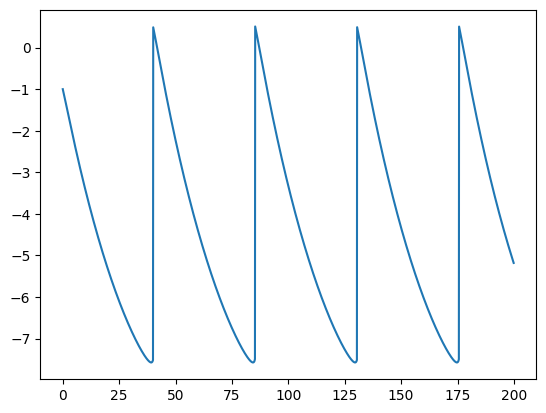

In [185]:
plt.plot(ts, us)

1b

In [186]:
delta_t = 0.1
end_time = 200
vs = [-65]
us = [-1]
ts = np.arange(0, end_time, delta_t)


I = 10
a = 0.02
b = 0.25
c = -65
d = 2


for i in range(1, len(ts)):
    t = ts[i-1]
    v = vs[i-1]
    u = us[i-1]

    u_new = u + (delta_t * (a * ((b * v) - (u))))

    delta_v = (0.04 * (v * v)) + (5 * v) + 140 - u + I

    v_new = v + (delta_t * delta_v)

    if v == 30:
        v_new = c
        u_new = u + d
    elif v_new >= 30:
        v_new = 30

    us.append(u_new)
    vs.append(v_new)

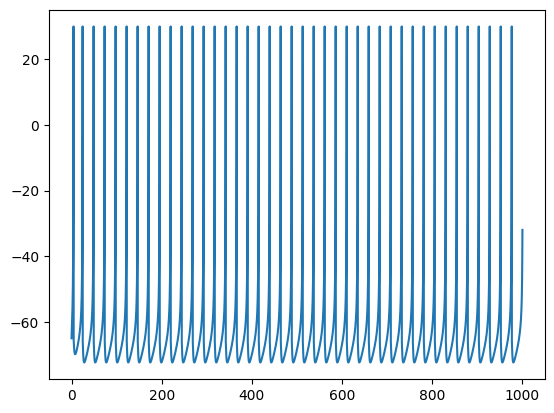

In [192]:
plt.plot(ts, vs)
plt.show()

1c

In [195]:
Is = []
spikes = []

delta_t = 0.1
end_time = 1000


I = 10
a = 0.02
b = 0.2
c = -65
d = 8

for I in range(20):
    Is.append(I)
    vs = [-65]
    us = [-1]
    ts = np.arange(0, end_time, delta_t)

    num_spikes = 0
    
    
    for i in range(1, len(ts)):
        t = ts[i-1]
        v = vs[i-1]
        u = us[i-1]
    
        u_new = u + (delta_t * (a * ((b * v) - (u))))
    
        delta_v = (0.04 * (v * v)) + (5 * v) + 140 - u + I
    
        v_new = v + (delta_t * delta_v)
    
        if v == 30:
            v_new = c
            u_new = u + d
        elif v_new >= 30:
            num_spikes += 1
            v_new = 30
    
        us.append(u_new)
        vs.append(v_new)
    spikes.append(num_spikes)
        

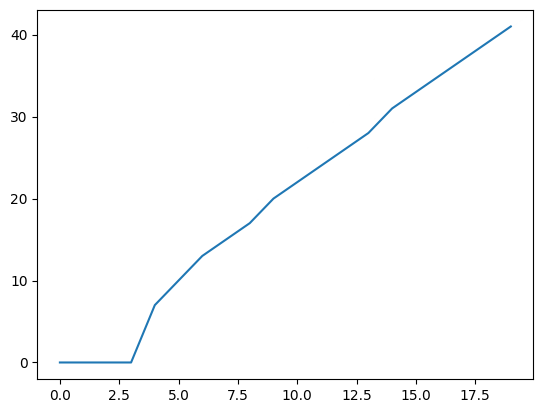

In [196]:
plt.plot(Is, spikes)

2

In [232]:
N = 4 # number of neurons
delta_t = 0.1
end_time = 200
vs = [-65]
us = [-1]
ts = np.arange(0, end_time, delta_t)

neuron_parameters = np.ndarray((N, 4))
vs = np.ndarray((N,  len(ts)))
us = np.ndarray((N, len(ts)))
spike_times = [[] for _ in range(5)]

In [233]:
def next_u_v(u, v, a, b, c, d, I):
    delta_v = (0.04 * (v * v)) + (5 * v) + 140 - u + I

    v_new = v + (delta_t * delta_v)
    u_new = u + (delta_t * (a * ((b * v) - (u))))

    if v == 30:
        v_new = c
        u_new = u + d
    elif v_new >= 30:
        v_new = 30
        
    return (u_new, v_new)


In [234]:
I = 5

for i in range(N):
    vs[i][0] = -65
    us[i][0] = -1

    r = np.random.uniform(0, 1)
    
    a = 0.02
    neuron_parameters[i][0] = a
    
    b = 0.2
    neuron_parameters[i][1] = b
    
    c = -65 + (15 * r * r)
    neuron_parameters[i][2] = c
    
    d = 8 - (6 * r * r)
    neuron_parameters[i][3] = d

for x in range(1, len(ts)):
    t = ts[x-1]
    for i in range(N):
        a, b, c, d = neuron_parameters[i][0], neuron_parameters[i][1], neuron_parameters[i][2], neuron_parameters[i][3]
        
        v = vs[i-1][x-1]
        u = us[i-1][x-1]

        u_new, v_new = next_u_v(u, v, a, b, c, d, I)

        if v_new == 30:
            spike_times[i].append(t)
    
        us[i][x] = u_new
        vs[i][x] = v_new

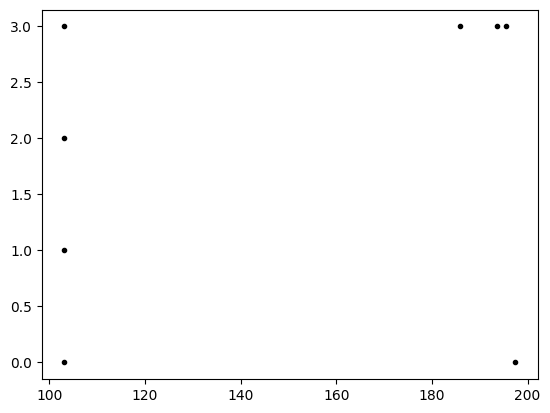

In [235]:
for neuron_idx, times in enumerate(spike_times):
    plt.scatter(times, [neuron_idx] * len(times), marker='.', color='black')

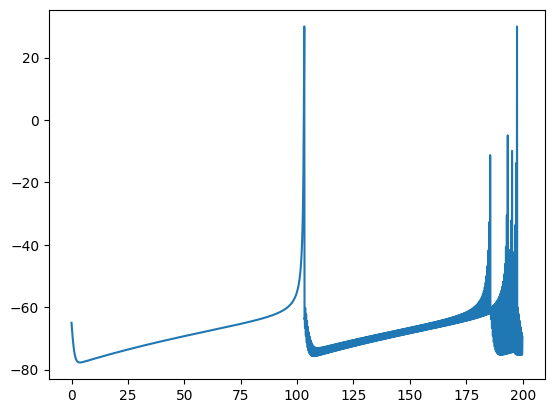

In [236]:
plt.plot(ts, vs[0])